# **Uber Drive Data Analysis**

## **Importing Uber Drive Dataset From Kaggle**

## **Importing Essential Libraries**

In [5]:
! pip install folium 


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

## **Reading Datasets**

The Uber Dataset contains 6 individual files representing its rides in each month from april to september.

Reading csv files using pandas

In [7]:
apr_data = pd.read_csv("C:\\Users\\GHANESH\\Downloads\\uber-raw-data-apr14.csv")
may_data = pd.read_csv("C:\\Users\\GHANESH\\Downloads\\uber-raw-data-may14.csv")
jun_data = pd.read_csv("C:\\Users\\GHANESH\\Downloads\\uber-raw-data-jun14.csv")
jul_data = pd.read_csv("C:\\Users\\GHANESH\\Downloads\\uber-raw-data-jul14.csv")
aug_data = pd.read_csv("C:\\Users\\GHANESH\\Downloads\\uber-raw-data-aug14.csv")
sep_data = pd.read_csv("C:\\Users\\GHANESH\\Downloads\\uber-raw-data-sep14.csv")

In [8]:
# concatenating datasets
df = pd.concat([apr_data, may_data, jun_data, jul_data, aug_data, sep_data], axis=0)

## **Data Preprocessing**

In [9]:
# shape of the dataset
df.shape

(4534327, 4)

Dataset consists of over 4.5 million rows and only 4 columns.

Checking for null values



In [10]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

There are no null values in the dataframe

In [11]:
# overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


Changing the format of Date/Time column

In [12]:
# converting the data type of Date/Time column into pandas datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [13]:
# data type of each column
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

Splitting the Date/Time column into several columns

In [14]:
df['month'] = df['Date/Time'].dt.month
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['hour'] = df['Date/Time'].dt.hour
df['minute'] = df['Date/Time'].dt.minute

In [15]:
# top five rows of the dataframe
df.head()

Date/Time      Lat      Lon    Base  month  weekday  day  hour  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512      4  Tuesday    1     0   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512      4  Tuesday    1     0   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512      4  Tuesday    1     0   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512      4  Tuesday    1     0   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512      4  Tuesday    1     0   

   minute  
0      11  
1      17  
2      21  
3      28  
4      33

## **Exploratory Data Analysis on Uber Dataset**

In [16]:
# setting seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("bright")

### **Number of rides booked from each base**

In [17]:
# number of rides booked from each Base 
df['Base'].value_counts()

Base
B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: count, dtype: int64

Instead of viewing the data in text format, it is preferrable to use visualization.

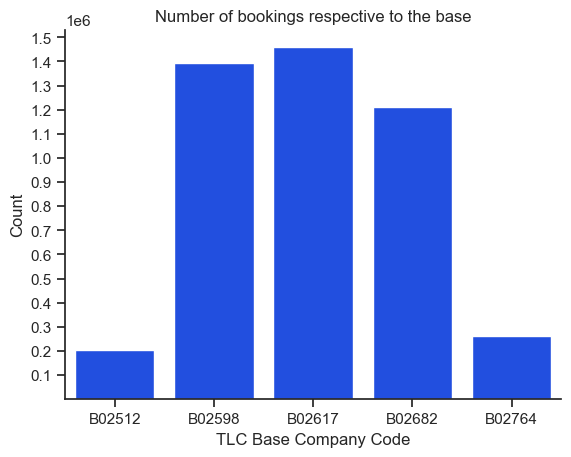

In [18]:
# plotting the data using seaborn countplot
sns.countplot(data = df, x ='Base')
plt.xlabel('TLC Base Company Code') # x-axis name
plt.ylabel('Count') # y-axis name
plt.yticks(ticks=np.arange(100000, 1600000, 100000)) # y-axis markings
plt.title('Number of bookings respective to the base') # title name
plt.show()

B02617 base bookings was used the most while B02512 base was used the least.

### **Number of trips in each month**

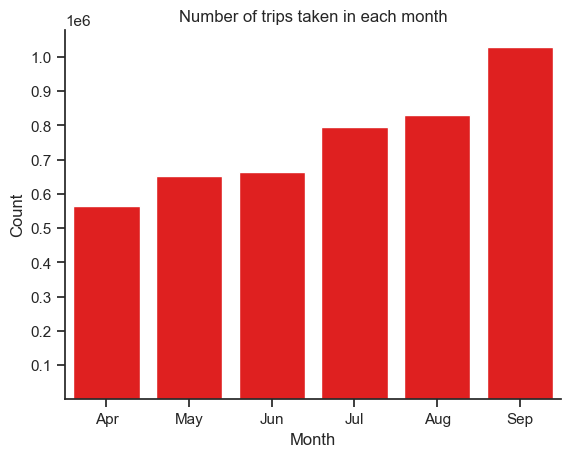

In [19]:
# plotting the data using seaborn countplot
sns.countplot(data = df, x = df['month'], color = 'red')
plt.xlabel('Month') # x-axis name
plt.xticks(ticks=[0,1,2,3,4,5],labels=['Apr','May','Jun','Jul','Aug','Sep']) # x-axis markings
plt.ylabel('Count') # y-axis name
plt.yticks(ticks=np.arange(100000, 1100000, 100000)) # y-axis markings
plt.title('Number of trips taken in each month')
plt.show()

Uber rides gradually increased from April to September.

### **Number of trips on each day**

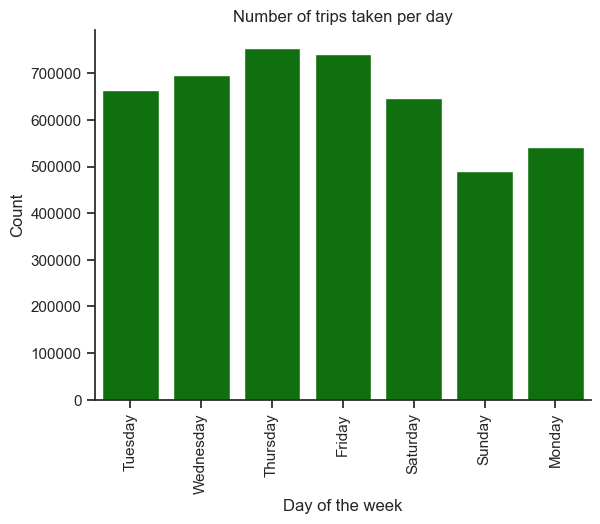

In [20]:
# plotting the data using seaborn countplot
sns.countplot(data = df, x = df['weekday'], color = 'green')
plt.xlabel('Day of the week') # x-axis name
plt.xticks(rotation=90)
plt.ylabel('Count') # y-axis name
plt.title('Number of trips taken per day')
plt.show()

Thursday and the weekend was the busiest days in a week for the Uber.

### **Number of trips at each hour**

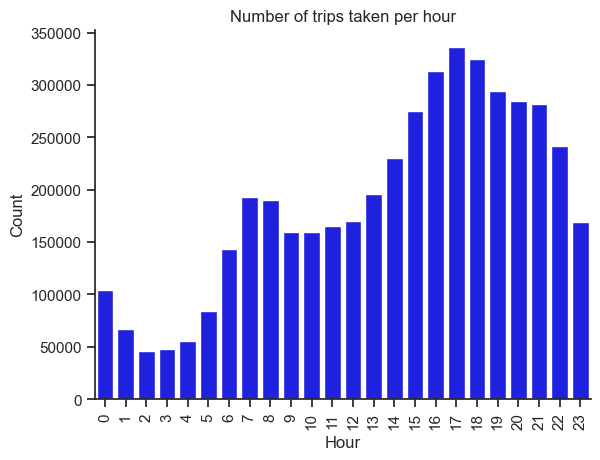

In [21]:
# plotting the data using seaborn countplot
sns.countplot(data = df, x = df['hour'], color = 'blue')
plt.xlabel('Hour') # x-axis name
plt.xticks(rotation=90) # rotating x-axis names vertically
plt.ylabel('Count') # y-axis name
plt.title('Number of trips taken per hour')
plt.show()

From the graph above, we can see that most of the Uber trips were taken at 05:00 pm.

### **Number of trips taken at each hour in each month**

Grouping the dataset by **hour** and **month** columns using pandas groupby function.

In [22]:
temp_df = df.groupby(['hour','month']).size().reset_index()
temp_df

hour  month      0
0       0      4  11910
1       0      5  13875
2       0      6  14514
3       0      7  17953
4       0      8  21451
..    ...    ...    ...
139    23      5  24836
140    23      6  24182
141    23      7  29346
142    23      8  33609
143    23      9  36568

[144 rows x 3 columns]

Pivoting the modified dataframe with its index as **hour** and columns as **month**.

In [23]:
temp_df = temp_df.pivot_table(index='hour',columns='month',values=0)
temp_df

month        4        5        6        7        8        9
hour                                                       
0      11910.0  13875.0  14514.0  17953.0  21451.0  24133.0
1       7769.0   8186.0   9167.0  11527.0  14471.0  16107.0
2       4935.0   5372.0   6189.0   8562.0  10105.0  10702.0
3       5040.0   5946.0   6937.0   9199.0  10376.0  10789.0
4       6095.0   6945.0   7701.0  10040.0  11774.0  12675.0
5       9476.0  10789.0  11955.0  14932.0  16525.0  20262.0
6      18498.0  21015.0  22030.0  23456.0  24907.0  33307.0
7      24924.0  27413.0  30834.0  32545.0  34064.0  43314.0
8      22843.0  25460.0  29771.0  33387.0  34566.0  44477.0
9      17939.0  20507.0  24298.0  28486.0  30195.0  38542.0
10     17865.0  20801.0  23584.0  28558.0  30706.0  37634.0
11     18774.0  22055.0  24155.0  30120.0  31778.0  38821.0
12     19425.0  23595.0  25233.0  30900.0  32106.0  39193.0
13     22603.0  27699.0  28937.0  35832.0  35764.0  45042.0
14     27190.0  34363.0  34428.0  41357.0  40644.0  52643.0
15     35324.0  43087.0  41586.0  46053.0  48197.0  61219.0
16     42003.0  49127.0  48162.0  52403.0  53481.0  68224.0
17     45475.0  51508.0  50452.0  58260.0  57122.0  73373.0
18     43003.0  48965.0  45013.0  57268.0  55390.0  75040.0
19     38923.0  42387.0  38203.0  52332.0  53008.0  69660.0
20     36244.0  40731.0  40108.0  51859.0  51674.0  63988.0
21     36964.0  42217.0  40791.0  49528.0  51354.0  60606.0
22     30645.0  35556.0  35614.0  42218.0  46008.0  51817.0
23     20649.0  24836.0  24182.0  29346.0  33609.0  36568.0

<Axes: xlabel='hour'>

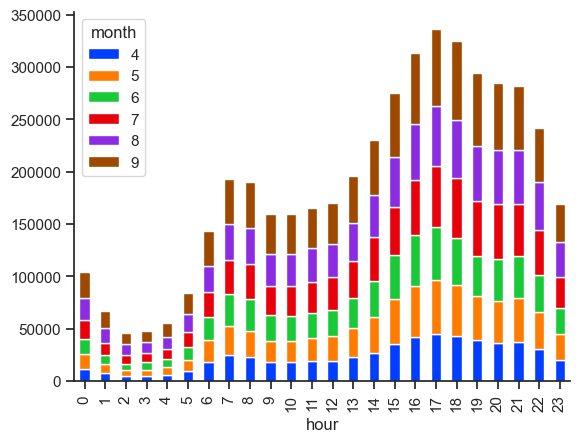

In [24]:
# using bar plot in pandas for plotting stacked bar graph
temp_df.plot(kind='bar',stacked=True)

Rather than the previous graph this stacked graph shows us the number of rides booked with monthly divison.

By this graph we can conclude that comparably most of the rides are booked during August and September months during office leaving hours.

### **Number of trips per month on different bases**

Grouping the dataset by **Base** and **month** columns and then *pivoting* the dataset with its index as **Base** and columns as **month**.

In [25]:
temp_df = df.groupby(['Base','month']).size().reset_index().pivot_table(index='Base',columns='month',values=0)
temp_df

month          4         5         6         7         8         9
Base                                                              
B02512   35536.0   36765.0   32509.0   35021.0   31472.0   34370.0
B02598  183263.0  260549.0  242975.0  245597.0  220129.0  240600.0
B02617  108001.0  122734.0  184460.0  310160.0  355803.0  377695.0
B02682  227808.0  222883.0  194926.0  196754.0  173280.0  197138.0
B02764    9908.0    9504.0    8974.0    8589.0   48591.0  178333.0

<Axes: xlabel='Base'>

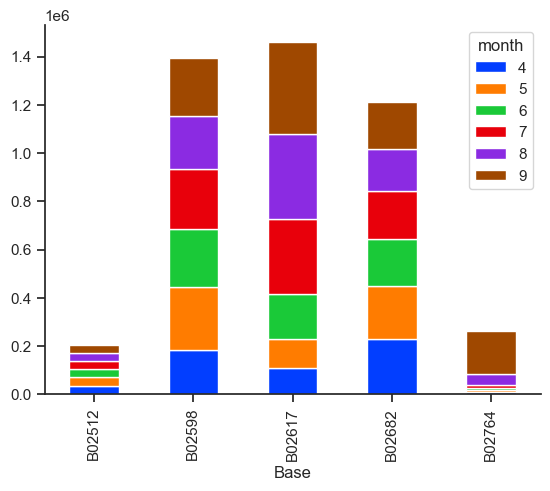

In [26]:
# using bar plot in pandas
temp_df.plot(kind='bar',stacked=True)

As previously noticed the bases B02598, B02617, B02682 were booked the most.

## **Heatmaps**

### **Heatmap of trips on each day at each hour**

Grouping the dataset by **day** and **hour** columns and then *pivoting* the dataset with its index as **day** and columns as **hour**.

<Axes: xlabel='day', ylabel='hour'>

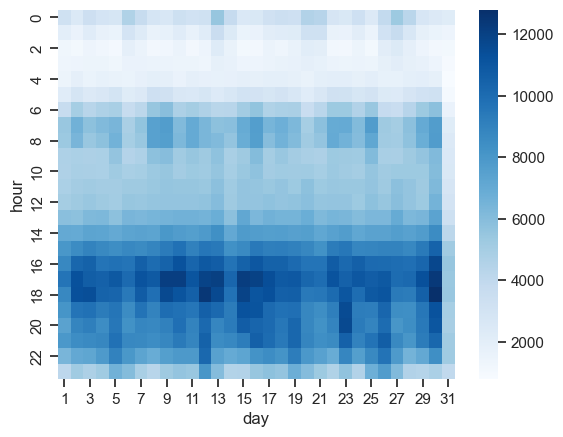

In [27]:
temp_df = df.groupby(['hour','day']).size().reset_index().pivot_table(index='hour',columns='day',values=0)
# heatmap function to visualize
sns.heatmap(temp_df, cmap='Blues')

Brighter blue color means most rides and dark blue indicates less booking of Uber rides. Based on the heatmap we can conclude that most of the rides were taken in between 4:00 pm to 10:00 pm.

### **Heatmap of trips in each month during each day**

Grouping the dataset by **month** and **day** columns and then *pivoting* the dataset with its index as **month** and columns as **day**.

<Axes: xlabel='day', ylabel='month'>

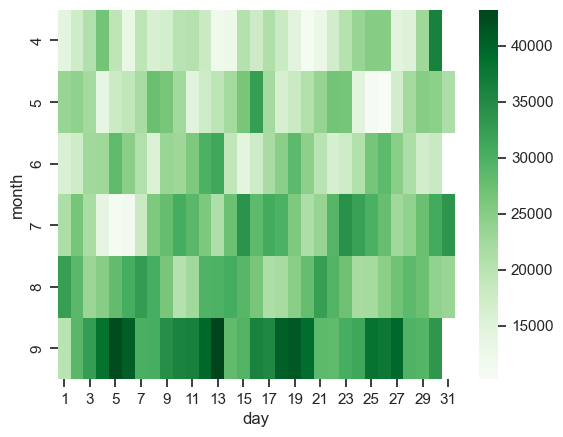

In [28]:
temp_df = df.groupby(['month','day']).size().reset_index().pivot_table(index='month',columns='day',values=0)
# heatmap function to visualize
sns.heatmap(temp_df,cmap='Greens')

On April 30th, Sep 5th, 13th, 19th, 27th most of the rides were booked.

### **Heatmap of trips in each month based on weekday**

Grouping the dataset by **month** and **weekday** columns and then *pivoting* the dataset with its index as **month** and columns as **weekday**.

<Axes: xlabel='weekday', ylabel='month'>

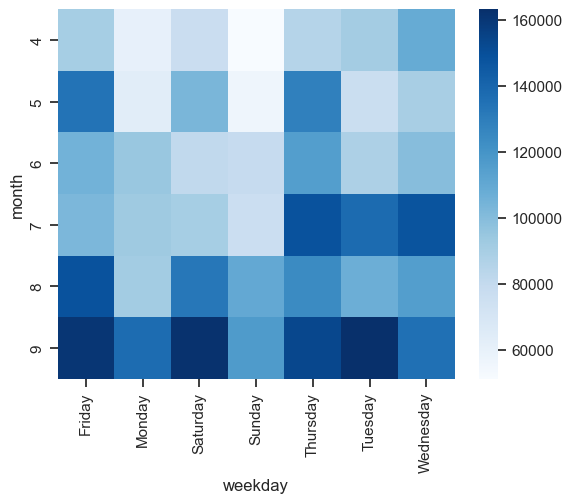

In [29]:
temp_df = df.groupby(['month','weekday']).size().reset_index().pivot_table(index='month',columns='weekday',values=0)
# heatmap function to visualize
sns.heatmap(temp_df,cmap='Blues')

Almost in every month most of the rides were booked on Thursday, Friday and Saturday.

### **Heatmap of trips during every month based of Base they were booked**

Grouping the dataset by **month** and **Base** columns and then *pivoting* the dataset with its index as **month** and columns as **Base**.

<Axes: xlabel='Base', ylabel='month'>

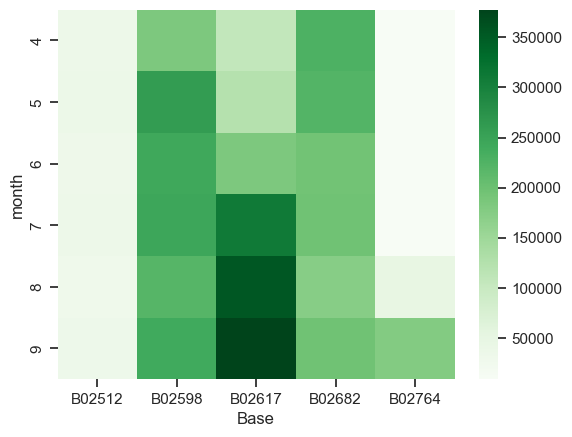

In [30]:
temp_df = df.groupby(['month','Base']).size().reset_index().pivot_table(index='month',columns='Base',values=0)
# heatmap function to visualize
sns.heatmap(temp_df,cmap='Greens')

High rides were booked on B02617 Base during August and September months.

### **Heatmap of trips on each day based on the Base they were booked**

Grouping the dataset by **weekday** and **Base** columns and then *pivoting* the dataset with its index as **weekday** and columns as **Base**.

<Axes: xlabel='Base', ylabel='weekday'>

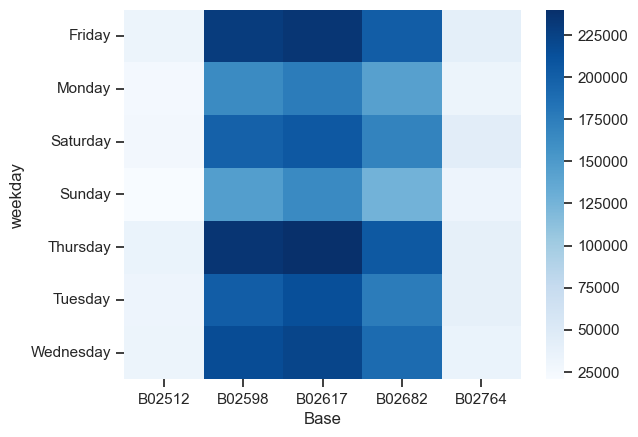

In [31]:
temp_df = df.groupby(['weekday','Base']).size().reset_index().pivot_table(index='weekday',columns='Base',values=0)
# heatmap function to visualize
sns.heatmap(temp_df,cmap='Blues')

From this heatmap, as we previously noticed through countplot, most of the uber rides were booked on Thursday and Friday from B02617 and B02598 bases. And from bases B02512 and B02764 harldy rides were booked.

## **Geo Spatial Analysis**

### **Initialising the map**

In [32]:
# Map in folium
basemap = folium.Map(width=500,height=500, zoom_start=4)

In [33]:
basemap

### **Mapping of the Uber rides taken on sunday of every week in every month**

In [34]:
# extracting the rides which were taken on Sunday
temp_df = df[df['weekday']=='Sunday']

In [35]:
# top 5 rows
temp_df.head()

Date/Time      Lat      Lon    Base  month weekday  day  hour  \
6965 2014-04-06 00:00:00  40.6547 -74.3033  B02512      4  Sunday    6     0   
6966 2014-04-06 00:00:00  40.7356 -74.0006  B02512      4  Sunday    6     0   
6967 2014-04-06 00:00:00  40.7421 -74.0041  B02512      4  Sunday    6     0   
6968 2014-04-06 00:00:00  40.7401 -74.0053  B02512      4  Sunday    6     0   
6969 2014-04-06 00:01:00  40.7368 -73.9877  B02512      4  Sunday    6     0   

      minute  
6965       0  
6966       0  
6967       0  
6968       0  
6969       1

The dataframe is grouped by latitude and longitude and the values as count.

In [36]:
# Grouping the dataframe by latitude and longitude
temp_df = temp_df.groupby(['Lat','Lon']).size().reset_index()
temp_df

Lat      Lon  0
0       39.9374 -74.0722  1
1       39.9378 -74.0721  1
2       39.9384 -74.0742  1
3       39.9385 -74.0734  1
4       39.9415 -74.0736  1
...         ...      ... ..
209225  41.3141 -74.1249  1
209226  41.3180 -74.1298  1
209227  41.3195 -73.6905  1
209228  41.3197 -73.6903  1
209229  42.1166 -72.0666  1

[209230 rows x 3 columns]

We will use Heatmap from folium.plugins to map the uber rides. The important parameter of the function is location which should be a numpy array.

In [37]:
#  converting the pandas dataframe into numpy array for passing in HeatMap
ls = [[row['Lat'], row['Lon']] for index, row in temp_df.iterrows()]

In [38]:
# Adding the Heatmap to our basemap
HeatMap(ls).add_to(basemap)
# visualizing the map
basemap

The map shows the Heatmap of Uber rides which were taken on Sunday in and around New York.

## **Conclusion**

Based on the analysis done above, we can conclude the following points.

1. Only 3 out of 5 bases were used the most.
2. The Uber rides gradually increased with time (from April to September months).
3. Uber rides were booked the most during office leaving hours.
4. The Uber services were widely used in between 07:00 AM to 10:00 PM each day.
5. Thursday, Friday and Saturday were the busiest days of Uber.
6. Uber rides were booked not only in New-York city alone but also outside of NYC (Sturbridge and Bridgehampton).